In [1]:
import pandas as pd
import numpy as np

file_name='ENT_CA_DM_Encounters.txt'
df=pd.read_csv(file_name,error_bad_lines=False,delimiter='|',parse_dates=True,index_col='enc_date')
print ('starting mrns:',len(df.mrn.unique()))
print ('total encounters in df:',df.shape[0])
cols=['mrn','encounter_type','department']
df=df[cols]
print ('\n',df.head())

### strain out non-relevant note types
def is_rel_department(d):
    '''returns true if the note is from a relevant department'''
    rel_depts=['HEMATOLOGY/ONCOLOGY','OTOLARYNGOLOGY','RADIATION ONCOLOGY']
    flag=False
    for dept in rel_depts:
        if d==dept:
            flag=True
    return flag
def is_rel_encounter(enc):
    '''returns true if the encounter type of the note is relevant'''
    rel_encs=['Surgery']
    flag=False
    for enc_type in rel_encs:
        if enc==enc_type:
            flag=True
    return flag
def produce_rel_mask(df):
    '''takes input of a df and creates a mask with True at notes that either of a relevant department or encounter type'''
    flags=[]
    for index,row in df.iterrows():
        flag=False
        enc_type=row['encounter_type']
        dept=row['department']
        if is_rel_encounter(enc_type):
            flag=True
        if is_rel_department(dept):
            flag=True
        flags.append(flag)
    return flags
rel_mask=produce_rel_mask(df)
df=df[rel_mask]
print ('after straining mrns:',len(df.mrn.unique()))
print ('total encounters in df for Hem/Onc,Oto,RadOnc or ref of surgery:',df.shape[0])

C:\Users\12488\python\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


starting mrns: 2660
total encounters in df: 449230

                 mrn    encounter_type        department
enc_date                                               
2016-01-08  1000196           History  GASTROENTEROLOGY
2016-01-15  1000196        Anesthesia             IR CD
2016-01-15  1000196  Anesthesia Event             IR CD
2016-03-08  1000196           History  GASTROENTEROLOGY
2016-03-08  1000196        Anesthesia             IR CD
after straining mrns: 2656
total encounters in df for Hem/Onc,Oto,RadOnc or ref of surgery: 215534


In [2]:
#mrn_df=pd.read_csv('recur_mrns_vivek.csv')
mrn_df=pd.read_csv('updated_RM_mrns.csv')
print ('total mrns:',mrn_df.shape[0])
### get all ptx mrns
all_patients=mrn_df['MRN'].unique()
recur_mrns=all_patients

print ('all recurrent mrns:',len(recur_mrns))
print ('MRNs from ptxs:',recur_mrns)

total mrns: 364
all recurrent mrns: 361
MRNs from ptxs: [ 540601  654028  656036  724115  765010  770827  788213  803715  816506
  927364  990013  991557  994594  995741 1037456 1070454 1143622 1173322
 1243678 1261329 1381378 1401130 1403342 1415504 1420705 1421402 1430302
 1504532 1566343 1600901 1627444 1631797 1656380 1720174 1735432 1827133
 1834727 1868643 1877486 1893019 1896755 1918636 1919417 1980198 1987131
 2050963 2085028 2097825 2107646 2124703 2147566 2247359 2249552 2262536
 2263614 2285852 2297503 2299167 2303444 2321107 2323950 2345400 2367965
 2388169 2390529 2415350 2424546 2450905 2451596 2455046 2460803 2480287
 2501243 2503109 2512720 2551966 2552775 2562716 2573707 2574798 2575702
 2577774 2583627 2587013 2593524 2594631 2596589 2603213 2609433 2612713
 2618129 2623193 2625779 2630671 2637473 2656523 2661812 2664470 2669377
 2669482 2681407 2688282 2691234 2709091 2714226 2719501 2723340 2731502
 2734580 2743967 2753762 2755230 2755561 2766384 2766597 2776756 278

In [3]:
print('starting notes:',df.shape[0])
### strain out only mrns from the recur_mrns

def in_recur_mrns(MRN):
    toReturn=False
    if MRN in recur_mrns:
        toReturn=True
    return toReturn
mask=df.mrn.apply(in_recur_mrns)
df=df[mask]
print ('notes associated with target MRNS:',df.shape[0])
df.to_csv('RM_Patient_Encounters.csv')

starting notes: 215534
notes associated with target MRNS: 24800


In [5]:
### create a df representing all encounters assoc with target mrns
df_all_events=df[['mrn']]
df_all_events['is_RM']=2
print (df_all_events.head())

### load a df representing the MCs you already have made with RM status
df_MCs=pd.read_csv('RM_MCs.csv',index_col='enc_date',parse_dates=True)
print(df_MCs.head())

### combine dfs
df_total=df_all_events.append(df_MCs)
print('mrns in encounter df:',len(df_all_events.mrn.unique()))
print('mrns in RM df:',len(df_MCs.mrn.unique()))
print('mrns in total df:',len(df_total.mrn.unique()))

                mrn  is_RM
enc_date                  
2005-02-17  1037456      2
2005-02-23  1037456      2
2005-03-08  1037456      2
2005-03-04  1037456      2
2005-03-29  1037456      2
                mrn  is_RM
enc_date                  
2013-02-12  2050963      0
2013-03-12  2050963      0
2013-03-12  2050963      0
2013-03-19  2050963      0
2013-03-19  2050963      0
mrns in encounter df: 257
mrns in RM df: 105
mrns in total df: 257


C:\Users\12488\python\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
#create list of dataframes - each represents an mrn
ptx_info=[]

for mrn in recur_mrns:
    df_sub=df_total[df_total.mrn==mrn]
    ptx_info.append(df_sub)
    
ptx_info2=([ptx for ptx in ptx_info if not ptx.empty])

print (len(ptx_info2))
print (ptx_info2)
ptx_info=ptx_info2

257
[               mrn  is_RM
enc_date                 
2003-04-15  540601      2
2003-04-15  540601      2
2003-04-15  540601      2
2003-06-23  540601      2
2003-04-28  540601      2
...            ...    ...
2005-03-29  540601      2
2005-03-21  540601      2
2003-10-23  540601      2
2004-06-16  540601      2
2004-06-11  540601      2

[81 rows x 2 columns],                mrn  is_RM
enc_date                 
2012-06-19  654028      2
2012-06-20  654028      2
2012-10-23  654028      2
2012-11-14  654028      2
2013-04-05  654028      2
...            ...    ...
2007-07-02  654028      2
2007-08-27  654028      2
2008-03-03  654028      2
2008-05-12  654028      2
2008-11-19  654028      2

[98 rows x 2 columns],                mrn  is_RM
enc_date                 
2005-09-20  656036      2
2005-09-27  656036      2
2005-09-30  656036      2
2005-09-28  656036      2
2005-10-11  656036      2
2005-10-12  656036      2
2005-10-13  656036      2
2005-10-25  656036      2
2005-11-08 

[186 rows x 2 columns]]


In [7]:
from datetime import datetime,timedelta
### sort the entries in each df by date
for index,ptx in enumerate(ptx_info):
    ptx_info[index]=ptx_info[index].sort_index(ascending=True)

def time_elapsed(start_date,current_date):
    '''get difference between two datetimes'''
    time=current_date-start_date
    return time

def times_elapsed(df):
    '''from a sorted df with a datetime index get a list of how many days it has been since 1st encounter'''
    start_date=df.index[0].to_pydatetime()
    times=[]
    for index,row in df.iterrows():
        current_date=index.to_pydatetime()
        time=time_elapsed(start_date,current_date)
        times.append(time.days)
    return times

for index,df in enumerate(ptx_info):
    ptx_info[index]['days_elapsed']=times_elapsed(df)
    
df_rebuilt=''
for index,ptx in enumerate(ptx_info):
    if index==0:
        df_rebuilt=ptx_info[0]
    else:
        df_rebuilt=df_rebuilt.append(ptx)
df_rebuilt.to_csv('Total_Enc_Info.csv')

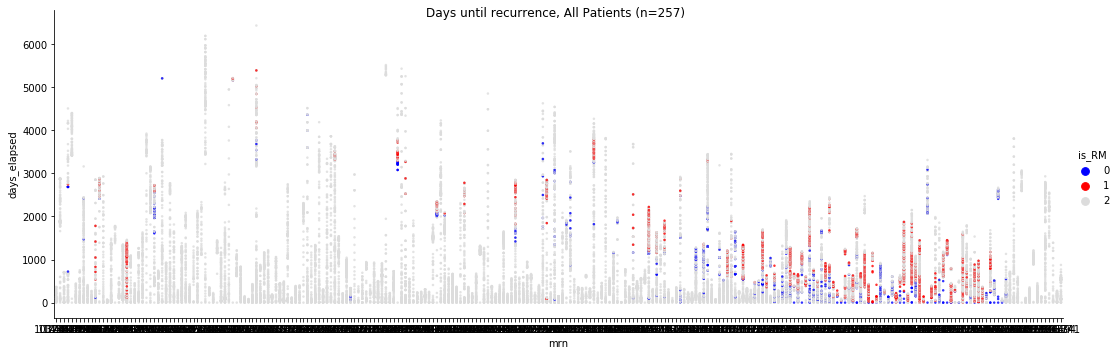

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

df_working=df_rebuilt
df_working['mrn']=df_working['mrn'].astype(str)
grid=sns.catplot(x='mrn', y="days_elapsed", hue="is_RM", palette={0:'Blue',1:'Red',2:'#DCDCDC'},**{'alpha':.8,'s':2.5},jitter=False, data=df_working, height=5, aspect=3)
grid.fig.suptitle('Days until recurrence, All Patients (n='+str(len(ptx_info))+')')
plt.savefig('recurrence_timeline_all_encounters.png')

In [9]:
df=pd.read_csv('RM_Patient_Encounters.csv')
print(df.encounter_type.unique(),'\n')
print(df.department.unique())

def get_ptx_group(ptx):
    '''takes input of the dataframe 'ptx' and returns a group designation'''
    hasHO=False
    hasOTO=False
    hasRO=False
    hasSurg=False
    for index,row in ptx.iterrows():
        enc_type=row['encounter_type']
        dept=row['department']
        if enc_type=='Surgery':
            hasSurg=True
        if dept is not np.nan:
            if dept=='HEMATOLOGY/ONCOLOGY':
                hasHO=True
            if dept=='OTOLARYNGOLOGY':
                hasOTO=True
            if dept=='RADIATION ONCOLOGY':
                hasRO=True
    def get_group(hasHO,hasOTO,hasRO,hasSurg):
        '''return the group designation based on input flags'''
        group=0
        if (hasOTO or hasSurg) and not hasHO and not hasRO:
            group=1
        if hasSurg and hasRO and not hasHO:
            group=2
        if hasSurg and hasRO and hasHO:
            group=3
        if hasHO and not (hasSurg or hasRO):
            group=4
        return group
    group=get_group(hasHO,hasOTO,hasRO,hasSurg)
    return group

#create list of dataframes - each represents an mrn
ptx_info=[]

for mrn in recur_mrns:
    df_sub=df[df.mrn==mrn]
    ptx_info.append(df_sub)
    
ptx_info2=([ptx for ptx in ptx_info if not ptx.empty])

print (len(ptx_info2))
#print (ptx_info2)
ptx_info=ptx_info2

#attach group designation to each ptx
for index,ptx in enumerate(ptx_info):
    group=get_ptx_group(ptx_info[index])
    ptx_info[index]['group']=group

# remake big df
df_rebuilt=''
for index,ptx in enumerate(ptx_info):
    if index==0:
        df_rebuilt=ptx_info[0]
    else:
        df_rebuilt=df_rebuilt.append(ptx)
print ('unique groups represented:',df_rebuilt.group.unique())

### create sub_df for each group:
df_0=df_rebuilt[df_rebuilt.group==0]
df_1=df_rebuilt[df_rebuilt.group==1]
df_2=df_rebuilt[df_rebuilt.group==2]
df_3=df_rebuilt[df_rebuilt.group==3]
df_4=df_rebuilt[df_rebuilt.group==4]
print ('df_0 size:',df_0.shape[0])
print ('df_1 size:',df_1.shape[0])
print ('df_2 size:',df_2.shape[0])
print ('df_3 size:',df_3.shape[0])
print ('df_4 size:',df_4.shape[0])

### get mrns for each group
mrns0=df_0.mrn.unique()
mrns1=df_1.mrn.unique()
mrns2=df_2.mrn.unique()
mrns3=df_3.mrn.unique()
mrns4=df_4.mrn.unique()

# examine df_0 patients

df_0.to_csv('dumpyard.csv')

['Appointment' 'Surgery' 'Hospital Encounter' 'Office Visit' 'History'
 'Documentation Only' 'Lab Only' 'Recurring Plan' 'Treatment'
 'Clinical Support Visit' 'Tumor Board'] 

['OTOLARYNGOLOGY' 'RADIATION ONCOLOGY' 'HEMATOLOGY/ONCOLOGY' nan]
257


C:\Users\12488\python\lib\site-packages\ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


unique groups represented: [3 2 0 4 1]
df_0 size: 1814
df_1 size: 111
df_2 size: 77
df_3 size: 22367
df_4 size: 431


In [10]:
df_total=pd.read_csv('Total_Enc_Info.csv')
def get_group_mask(mrn,group_num):
    rel_mrns=[]
    if group_num==0:
        rel_mrns=mrns0
    if group_num==1:
        rel_mrns=mrns1
    if group_num==2:
        rel_mrns=mrns2
    if group_num==3:
        rel_mrns=mrns3
    if group_num==4:
        rel_mrns=mrns4
    flag=False
    if mrn in rel_mrns:
        flag=True
    return flag
df_total_0_mask=df_total.mrn.apply(get_group_mask,args=[0])
df_total_1_mask=df_total.mrn.apply(get_group_mask,args=[1])
df_total_2_mask=df_total.mrn.apply(get_group_mask,args=[2])
df_total_3_mask=df_total.mrn.apply(get_group_mask,args=[3])
df_total_4_mask=df_total.mrn.apply(get_group_mask,args=[4])
df_total_0=df_total[df_total_0_mask]
df_total_1=df_total[df_total_1_mask]
df_total_2=df_total[df_total_2_mask]
df_total_3=df_total[df_total_3_mask]
df_total_4=df_total[df_total_4_mask]
print ('size of df_total_0:',df_total_0.shape[0])
print ('size of df_total_1:',df_total_1.shape[0])
print ('size of df_total_2:',df_total_2.shape[0])
print ('size of df_total_3:',df_total_3.shape[0])
print ('size of df_total_4:',df_total_4.shape[0])

size of df_total_0: 2008
size of df_total_1: 111
size of df_total_2: 77
size of df_total_3: 24357
size of df_total_4: 585


C:\Users\12488\python\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


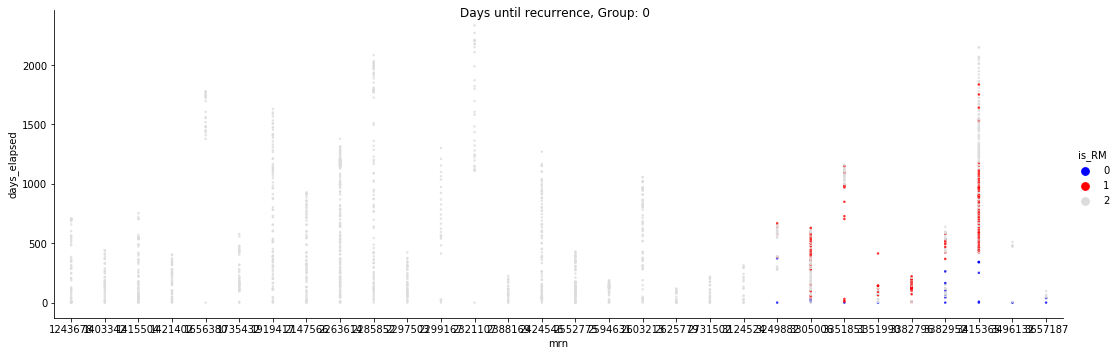

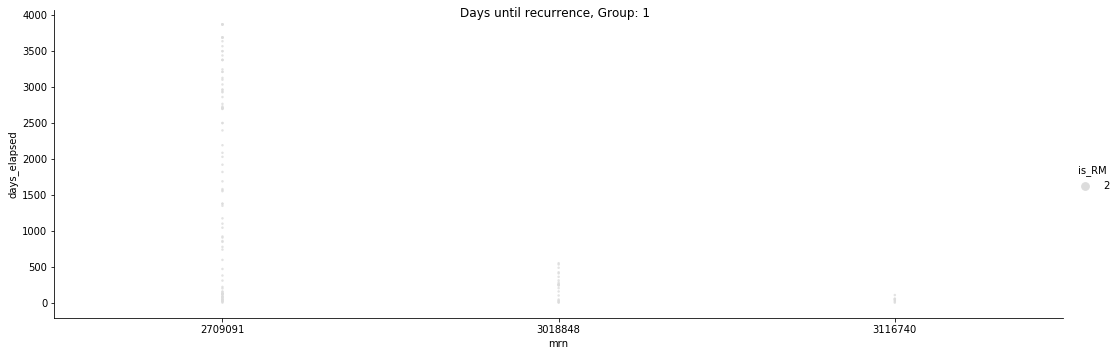

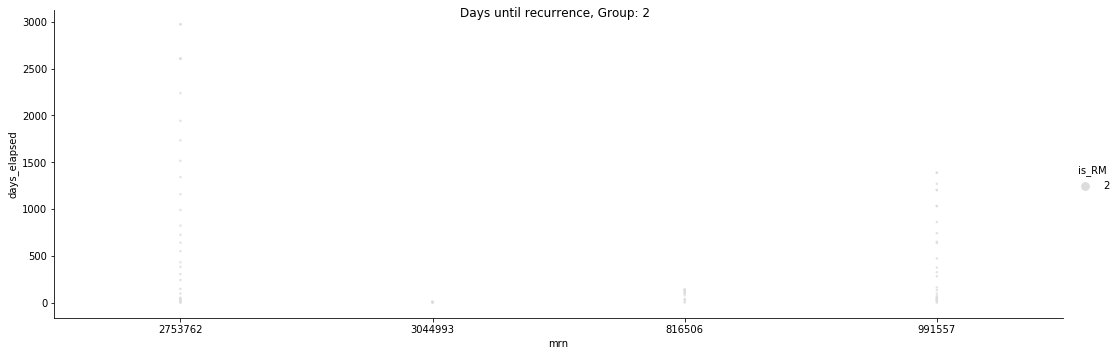

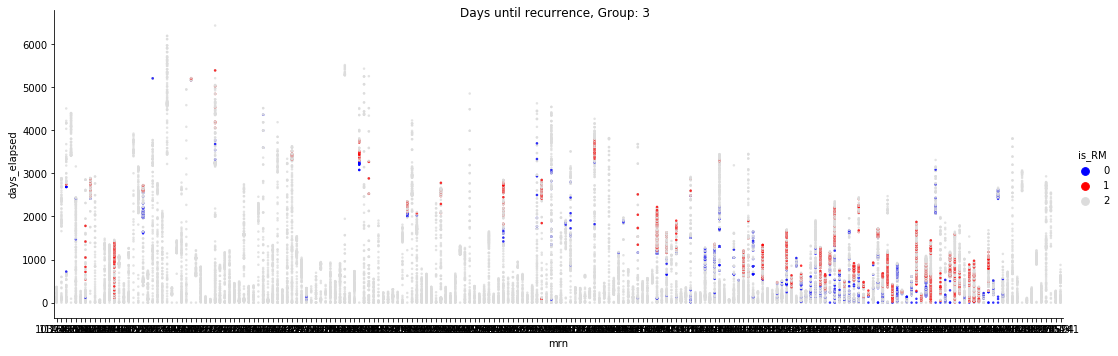

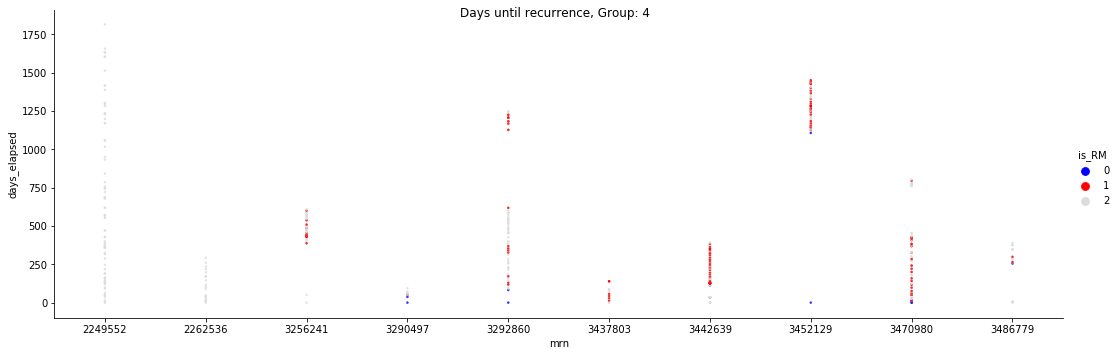

In [11]:
df_to_graph=[df_total_0,df_total_1,df_total_2,df_total_3,df_total_4]

for index,df_data in enumerate(df_to_graph):
    if df_data.shape[0]!=0:
        df_working=df_data
        df_working['mrn']=df_working['mrn'].astype(str)
        grid=sns.catplot(x='mrn', y="days_elapsed", hue="is_RM", palette={0:'Blue',1:'Red',2:'#DCDCDC'},**{'alpha':.8,'s':2.5},jitter=False, data=df_working, height=5, aspect=3)
        grid.fig.suptitle('Days until recurrence, Group: '+str(index))
        fig_name='Recurrence_by_Tx_Group '+str(index)+'.png'
        plt.savefig(fig_name)

In [12]:
### divide up groups by TNM Staging
df=pd.read_csv('HNDB Progress Notes Processed.csv',parse_dates=True, index_col='date_of_service_dttm')
cols_to_keep=['mrn','stage']
df=df[cols_to_keep]
print('number of mrns at start:',len(df.mrn.unique()))
df=df.dropna(subset=['stage'])
df.head()

### get mrns with a TNM stage
mrns=df.mrn.unique()
print('number of mrns with TNM stage:',len(mrns))

number of mrns at start: 105
number of mrns with TNM stage: 76


In [13]:
### all letters in TNM stage to uppercase
df.stage=df.stage.str.upper()

### define functions to get T value, N value, M value
def getT(stage):
    '''gets the value for T from stage'''
    toReturn=stage.split('N')[0]
    if toReturn[0] !='T':
        toReturn=toReturn[1:]    
    toReturn=toReturn[1:].strip()
    return toReturn
def getN(stage):
    '''gets value for N from stage'''
    toReturn=stage.split('M')[0]
    toReturn=toReturn.split('N')[1].strip()
    return toReturn
def getM(stage):
    if 'M' not in stage:
        return ''
    else:
        toReturn=stage.split('M')[1].strip()
        return toReturn

df['T']=df.stage.apply(getT)
df['N']=df.stage.apply(getN)
df['M']=df.stage.apply(getM)

#create a list of tuples, with mrn, T, N, M
TNM_info=[]
for mrn in mrns:
    df_sub=df[df.mrn==mrn]
    T=df_sub.iloc[-1]['T']
    N=df_sub.iloc[-1]['N']
    M=df_sub.iloc[-1]['M']
    TNM_info.append((mrn,T,N,M))
print(TNM_info)


[(746451, '4A', '0', ''), (1566343, '4A', '2C', '1'), (2168328, '4A', '2B', ''), (2592383, '4', '2C', 'X'), (2344950, '2', '2B', ''), (2558297, 'X', '2B', ''), (3074909, '3', '1', ''), (3237695, '1', '2B', ''), (3098819, '2', '2B', ''), (3148181, '2', '2B', ''), (3151830, '4', '2A', '0'), (3232866, '3', '1', ''), (2958683, '3', '2C', ''), (3276187, '3', '1', ''), (2975979, '1', '1', ''), (3307560, '4', '0', ''), (3309751, '2', '2B', '0'), (3361810, '4', '3', ''), (3385495, 'X', '2', ''), (3415365, 'X', '2C', '0'), (3417444, '4', '2', ''), (3079917, '2', '2B', ''), (3470980, '2', '1', '0'), (3105416, '3', '2B', ''), (3505124, 'X', '3', 'X'), (3510122, '3', '0', '0'), (3523447, '4B', '2C', ''), (3525788, '4', '0', ''), (3393714, '3', '0', ''), (3420249, '4', '0', ''), (3540388, '2', '1', 'X'), (3547745, 'X', '2', '0'), (3561526, '3', '2', '0'), (3581057, '4A', '2B', ''), (3646144, '2', '0', '0'), (3652367, '2', '2C', ''), (3656456, '3', '2B', 'X'), (3666323, '2', '2B', ''), (3743073, '3'

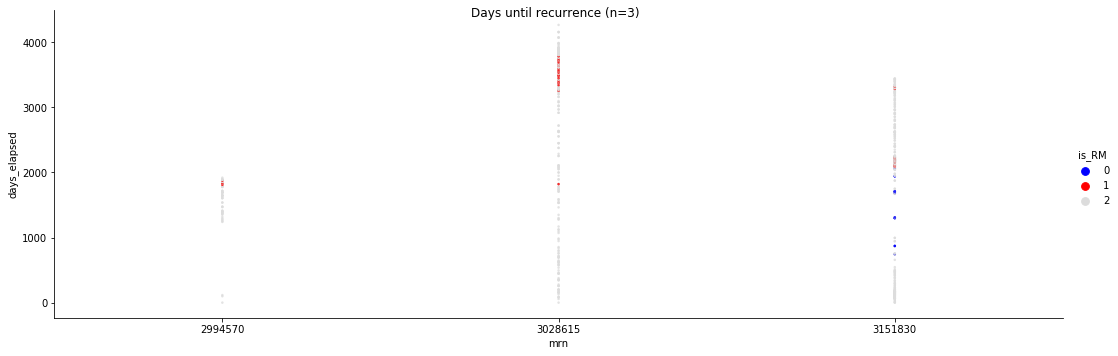

In [18]:
def graph_trajectory(mrns,fig_title=''):
    '''takes a list of mrns and outputs ptx trajectory fig of those mrns, with optional figure title/saving'''
    df=pd.read_csv('Total_Enc_Info.csv')
    df_mask=[]
    for index,row in df.iterrows():
        if row['mrn'] in mrns:
            df_mask.append(True)
        else:
            df_mask.append(False)
    df=df[df_mask]
    ### cast mrn to string so that it is evenly distributed on the x-axis
    df['mrn']=df['mrn'].astype(str)
    grid=sns.catplot(x='mrn', y="days_elapsed", hue="is_RM", palette={0:'Blue',1:'Red',2:'#DCDCDC'},**{'alpha':.8,'s':2.5},jitter=False, data=df, height=5, aspect=3)
    grid.fig.suptitle('Days until recurrence (n='+str(len(df.mrn.unique()))+')')
    if fig_title !="":
        plt.savefig(fig_title)

practice_mrns=[3028615,3151830,2994570]
graph_trajectory(practice_mrns,fig_title='practice.png')
